# Importing Libraries and Loading the data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np
import pandas as pd 
import cv2
import random
import os
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
%matplotlib inline

import keras 
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras.applications.inception_resnet_v2 import InceptionResNetV2
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras import layers, models, optimizers
from keras.models import load_model

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/randomimg/quinn-buffing-N-0V-LpQ-18-unsplash.jpg
/kaggle/input/example-img/mask.png
/kaggle/input/face-mask-detection-data/without_mask/Faceimg907.jpg
/kaggle/input/face-mask-detection-data/without_mask/Faceimg542.jpg
/kaggle/input/face-mask-detection-data/without_mask/Faceimg569.jpg
/kaggle/input/face-mask-detection-data/without_mask/Faceimg457.jpg
/kaggle/input/face-mask-detection-data/without_mask/Faceimg1,449.jpg
/kaggle/input/face-mask-detection-data/without_mask/Faceimg967.jpg
/kaggle/input/face-mask-detection-data/without_mask/Faceimg13.jpg
/kaggle/input/face-mask-detection-data/without_mask/Faceimg1,824.jpg
/kaggle/input/face-mask-detection-data/without_mask/Faceimg1,645.jpg
/kaggle/input/face-mask-detection-data/without_mask/Faceimg1,743.jpg
/kaggle/input/face-mask-detection-data/without_mask/Faceimg650.jpg
/kaggle/input/face-mask-detection-data/without_mask/Faceimg1,342.jpg
/kaggle/input/face-mask-detection-data/without_mask/Faceimg1,518.jpg
/kaggle/input/face-m

In [2]:
mask_dir = '../input/face-mask-detection-data/with_mask'
no_mask_dir = '../input/face-mask-detection-data/without_mask'
mask_img = [f'{mask_dir}/{i}' for i in os.listdir(mask_dir)]
no_mask_img = [f'{no_mask_dir}/{i}' for i in os.listdir(no_mask_dir)]

In [3]:
# Identify how many images are there in each group and in total

print("Total number of images with mask: " + str(len(mask_img)))
print("Total number of images without mask: " + str(len(no_mask_img)))
print("Total images: " + str(len(mask_img) + len(no_mask_img)))

Total number of images with mask: 1915
Total number of images without mask: 1918
Total images: 3833


# Splitting the data

In [4]:
# Here the data is split into 80% train and 20% test data.

tr_mask = mask_img[0:1499]
tr_no_mask = no_mask_img[0:1499]
test_mask = mask_img[1500:]
test_no_mask = no_mask_img[1500:]


In [5]:
# Combining the training and testing datasets.

train_img = tr_mask + tr_no_mask
test_img = test_mask + test_no_mask

# Pre-Processing the data

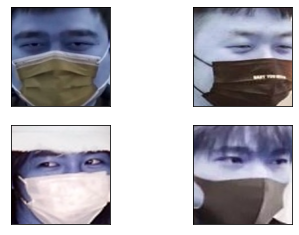

In [6]:
# Defining a function to convert the images into a 3 channel BGR color image.

# Creating labels like with mask = 0 and without mask = 1 for classification.

def process_imgs(imgs, width=150, height=150):
    x = []
    y = []
    for i in imgs:
        x.append(cv2.resize(cv2.imread(i, cv2.IMREAD_COLOR), (width, height), interpolation=cv2.INTER_CUBIC))
        label = 1 if 'without' in i else 0
        y.append(label)
    return np.array(x), np.array(y)

tr_x, tr_y = process_imgs(train_img)
test_x, test_y = process_imgs(test_img)

# plot 4 images just to see the results of processing the images
for i in range(4) :
    plt.subplot(2,2,i + 1)
    plt.imshow(tr_x[i])
    plt.xticks([])
    plt.yticks([])
plt.show() 

# Performing Image Augumentation

In [7]:
tr_data = ImageDataGenerator(rescale=1/255,
                            rotation_range=40,
                            width_shift_range=0.2,
                            height_shift_range=0.2,
                            shear_range=0.2,
                            zoom_range=0.2,
                            horizontal_flip=True)

tr_gen = tr_data.flow(tr_x, tr_y, batch_size=32)
test_gen = tr_data.flow(test_x, test_y, batch_size = 32)

# Building First Model (Without Transfer Learning)

In [8]:
# Designing the First CNN model.

model1 = models.Sequential()
model1.add(Conv2D(64, (1, 1), input_shape = (150,150,3), activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(128, (1, 1), activation='relu'))
model1.add(layers.Flatten())
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(2, activation='softmax'))

2021-12-06 03:37:22.031138: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-06 03:37:22.124894: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-06 03:37:22.125557: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-12-06 03:37:22.126645: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [9]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 64)      256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 128)       8320      
_________________________________________________________________
flatten (Flatten)            (None, 720000)            0         
_________________________________________________________________
dense (Dense)                (None, 256)               184320256 
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 514       
Total params: 184,329,346
Trainable params: 184,329,346
Non-trainable params: 0
__________________________________________

# Compiling and fitting the model

In [10]:
batch_size = 32
epochs = 20
model1.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['acc'])
hist1 = model1.fit(tr_gen, steps_per_epoch=tr_x.shape[0] // batch_size, epochs=epochs)

2021-12-06 03:37:24.775979: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2021-12-06 03:37:26.126534: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


93/93 [==============================] - 22s 162ms/step - loss: 3.5958 - acc: 0.7751
Epoch 2/20
93/93 [==============================] - 14s 155ms/step - loss: 0.4157 - acc: 0.8645
Epoch 3/20
93/93 [==============================] - 15s 157ms/step - loss: 0.3022 - acc: 0.8904
Epoch 4/20
93/93 [==============================] - 14s 155ms/step - loss: 0.2802 - acc: 0.8881
Epoch 5/20
93/93 [==============================] - 15s 161ms/step - loss: 0.2490 - acc: 0.9032
Epoch 6/20
93/93 [==============================] - 15s 155ms/step - loss: 0.2603 - acc: 0.9019
Epoch 7/20
93/93 [==============================] - 15s 161ms/step - loss: 0.2372 - acc: 0.9066
Epoch 8/20
93/93 [==============================] - 14s 155ms/step - loss: 0.2530 - acc: 0.8989
Epoch 9/20
93/93 [==============================] - 15s 163ms/step - loss: 0.2386 - acc: 0.9086
Epoch 10/20
93/93 [==============================] - 15s 157ms/step - loss: 0.2381 - acc: 0.9086
Epoch 11/20
93/93 [==============================]

In [11]:
# Comparing accuracy and loss of first CNN model on test data.

results1 = model1.evaluate(test_gen, batch_size = 32)
print("Test loss and test accuracy: ", results1)

27/27 [==============================] - 4s 149ms/step - loss: 0.2092 - acc: 0.9208
Test loss and test accuracy:  [0.20916171371936798, 0.9207683205604553]


# Saving the First Model

In [12]:
model1.save('model_1.h5')

# Visualizing the results

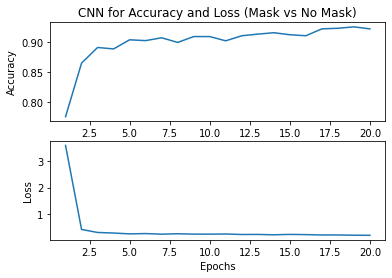

In [13]:
# Plotting loss and accuracy for first CNN model.

epochs1 = list(range(1, len(hist1.history['acc'])+1))
accuracy1 = hist1.history['acc']
loss1 = hist1.history['loss']

plt.subplot(2,1,1)
plt.plot(epochs1, accuracy1)
plt.title("CNN for Accuracy and Loss (Mask vs No Mask)")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.subplot(2,1,2)
plt.plot(epochs1, loss1)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Building second model (With Transfer Learning)

In [14]:
# Here we load the pre-trained weights from the ImageNet which saves training time.

base=InceptionResNetV2(input_shape = (150,150,3) , weights = 'imagenet' , include_top = False)

219070464/219055592 [==============================] - 1s 0us/step


In [15]:
# Adding few layers on top of our pre-trained model. 

model2 = models.Sequential()
model2.add(base)
model2.add(layers.Flatten())
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(2, activation='softmax'))
base.trainable = False

In [16]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 3, 3, 1536)        54336736  
_________________________________________________________________
flatten_1 (Flatten)          (None, 13824)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               3539200   
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 514       
Total params: 57,876,450
Trainable params: 3,539,714
Non-trainable params: 54,336,736
_________________________________________________________________


In [17]:
# Compiling and training the model.

batch_size = 32
epochs = 20
model2.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['acc'])
hist2 = model2.fit(tr_gen, steps_per_epoch=tr_x.shape[0] // batch_size, epochs=epochs)

Epoch 1/20
93/93 [==============================] - 25s 176ms/step - loss: 1.3622 - acc: 0.9120
Epoch 2/20
93/93 [==============================] - 16s 175ms/step - loss: 0.2589 - acc: 0.9572
Epoch 3/20
93/93 [==============================] - 16s 173ms/step - loss: 0.2110 - acc: 0.9606
Epoch 4/20
93/93 [==============================] - 16s 174ms/step - loss: 0.1572 - acc: 0.9585
Epoch 5/20
93/93 [==============================] - 17s 186ms/step - loss: 0.1207 - acc: 0.9700
Epoch 6/20
93/93 [==============================] - 16s 169ms/step - loss: 0.0994 - acc: 0.9656
Epoch 7/20
93/93 [==============================] - 17s 185ms/step - loss: 0.0722 - acc: 0.9784
Epoch 8/20
93/93 [==============================] - 16s 177ms/step - loss: 0.0848 - acc: 0.9707
Epoch 9/20
93/93 [==============================] - 16s 173ms/step - loss: 0.0706 - acc: 0.9754
Epoch 10/20
93/93 [==============================] - 17s 176ms/step - loss: 0.0680 - acc: 0.9764
Epoch 11/20
93/93 [====================

In [18]:
# Comparing the loss and accuracy of our second model on test data.

results2 = model2.evaluate(test_gen, batch_size = 32)
print("Test loss and test accuracy: ", results2)

27/27 [==============================] - 8s 177ms/step - loss: 0.0796 - acc: 0.9760
Test loss and test accuracy:  [0.0796186700463295, 0.9759904146194458]


# Saving the second model

In [19]:
model2.save('model_2.h5')

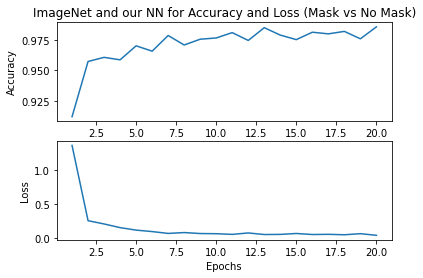

In [20]:
epochs2 = list(range(1, len(hist2.history['acc'])+1))
accuracy2 = hist2.history['acc']
loss2 = hist2.history['loss']


plt.subplot(2,1,1)
plt.plot(epochs2, accuracy2)
plt.title("ImageNet and our NN for Accuracy and Loss (Mask vs No Mask)")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.subplot(2,1,2)
plt.plot(epochs2, loss2)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Making Predictions

In [21]:
# Taking any random image and classifying it. 

from tensorflow.keras.preprocessing import image
img_path = "../input/random-img/anastasiia-chepinska-eGjHhmC_3ww-unsplash.jpg"
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_batch = np.expand_dims(img_array, axis=0)

In [22]:
model2.predict(img_batch)

array([[0., 1.]], dtype=float32)